# 1 Predecir el tiempo de entrega (Delivery Duration (min))
 - 1.1. 	Variables independientes: Distance (km), Weekend Order, Order Time
 - 1.2. 	¿La distancia y el horario afectan el tiempo de entrega?

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import pandas as pd

df = pd.read_csv("../dataset/taco_sales_2024-2025.csv")

In [6]:
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,27-05-2024 11:12,27-05-2024 12:11,59,Large,Veggie Taco,2,20.04,7.00,2.80,False
996,232442,The Taco Stand,San Antonio,03-04-2025 20:51,03-04-2025 21:29,38,Regular,Fish Taco,0,13.69,3.00,1.38,False
997,251729,Urban Tacos,Houston,23-01-2025 05:33,23-01-2025 06:41,68,Regular,Pork Taco,2,4.07,5.50,2.00,False
998,940215,Taco Fiesta,San Antonio,05-09-2024 15:49,05-09-2024 16:38,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False


In [7]:
df.dtypes

Order ID                     int64
Restaurant Name             object
Location                    object
Order Time                  object
Delivery Time               object
Delivery Duration (min)      int64
Taco Size                   object
Taco Type                   object
Toppings Count               int64
Distance (km)              float64
Price ($)                  float64
Tip ($)                    float64
Weekend Order                 bool
dtype: object

In [8]:
df['Order Time'] = pd.to_datetime(df['Order Time'], format="%d-%m-%Y %H:%M")
df['Order Day'] = df['Order Time'].dt.day

In [9]:
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Order Day
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,1
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,23
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False,21
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,21
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,2024-05-27 11:12:00,27-05-2024 12:11,59,Large,Veggie Taco,2,20.04,7.00,2.80,False,27
996,232442,The Taco Stand,San Antonio,2025-04-03 20:51:00,03-04-2025 21:29,38,Regular,Fish Taco,0,13.69,3.00,1.38,False,3
997,251729,Urban Tacos,Houston,2025-01-23 05:33:00,23-01-2025 06:41,68,Regular,Pork Taco,2,4.07,5.50,2.00,False,23
998,940215,Taco Fiesta,San Antonio,2024-09-05 15:49:00,05-09-2024 16:38,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False,5


In [10]:
df['Order Hour'] = df['Order Time'].dt.hour
df['Order Minute'] = df['Order Time'].dt.minute
df['Orde Month'] = df['Order Time'].dt.month


In [11]:
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Order Day,Order Hour,Order Minute,Orde Month
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,1,14,55,8
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,23,17,11,11
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False,21,20,24,11
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,21,6,43,9
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False,24,11,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,2024-05-27 11:12:00,27-05-2024 12:11,59,Large,Veggie Taco,2,20.04,7.00,2.80,False,27,11,12,5
996,232442,The Taco Stand,San Antonio,2025-04-03 20:51:00,03-04-2025 21:29,38,Regular,Fish Taco,0,13.69,3.00,1.38,False,3,20,51,4
997,251729,Urban Tacos,Houston,2025-01-23 05:33:00,23-01-2025 06:41,68,Regular,Pork Taco,2,4.07,5.50,2.00,False,23,5,33,1
998,940215,Taco Fiesta,San Antonio,2024-09-05 15:49:00,05-09-2024 16:38,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False,5,15,49,9


In [12]:
df['Order Time'] = pd.to_datetime(df['Order Time'], format='%d-%m-%Y %H:%M')
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'], format='%d-%m-%Y %H:%M')
df['True Duration'] = (df['Delivery Time'] - df['Order Time']).dt.total_seconds() / 60


In [13]:
df['Distance x Hour'] = df['Distance (km)'] * df['Order Hour']


In [14]:
df

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Order Day,Order Hour,Order Minute,Orde Month,True Duration,Distance x Hour
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,2024-08-01 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,1,14,55,8,41.0,42.14
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,2024-11-23 17:25:00,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,23,17,11,11,14.0,105.40
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,2024-11-21 21:02:00,38,Large,Pork Taco,2,20.33,7.00,0.02,False,21,20,24,11,38.0,406.60
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,2024-09-21 07:28:00,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,21,6,43,9,45.0,18.00
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,2024-07-24 11:16:00,15,Large,Pork Taco,0,24.34,4.50,1.14,False,24,11,1,7,15.0,267.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,2024-05-27 11:12:00,2024-05-27 12:11:00,59,Large,Veggie Taco,2,20.04,7.00,2.80,False,27,11,12,5,59.0,220.44
996,232442,The Taco Stand,San Antonio,2025-04-03 20:51:00,2025-04-03 21:29:00,38,Regular,Fish Taco,0,13.69,3.00,1.38,False,3,20,51,4,38.0,273.80
997,251729,Urban Tacos,Houston,2025-01-23 05:33:00,2025-01-23 06:41:00,68,Regular,Pork Taco,2,4.07,5.50,2.00,False,23,5,33,1,68.0,20.35
998,940215,Taco Fiesta,San Antonio,2024-09-05 15:49:00,2024-09-05 16:38:00,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False,5,15,49,9,49.0,218.40


In [31]:
df.dtypes

Order ID                            int64
Restaurant Name                    object
Location                           object
Order Time                 datetime64[ns]
Delivery Time              datetime64[ns]
Delivery Duration (min)             int64
Taco Size                          object
Taco Type                          object
Toppings Count                      int64
Distance (km)                     float64
Price ($)                         float64
Tip ($)                           float64
Weekend Order                        bool
Order Day                           int32
Order Hour                          int32
Order Minute                        int32
Orde Month                          int32
True Duration                     float64
Distance x Hour                   float64
dtype: object

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Codificar variables categóricas y extraer la hora del pedido
df_encoded = df.copy()

df_encoded["Order Hour"] = pd.to_datetime(df["Order Time"], format="%d-%m-%Y %H:%M").dt.hour
# Puedes agregar más columnas categóricas si lo deseas
categorical_cols = []  # Ejemplo: ['Taco Size', 'Taco Type', 'Location']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# features seleccionadas y codificadas
X = df_encoded[['Distance (km)', 'Orde Month','Distance x Hour']]
y = df['Delivery Duration (min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
import numpy as np

print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
print("R²:", r2_score(y_test, preds))


RMSE: 22.413402188490412
R²: 0.0010506838750506953


<div class="alert alert-block alert-info">
<b>Tip:</b> 
Intentab extraer el numero de la semana y agregarlo como una variable.
</div>

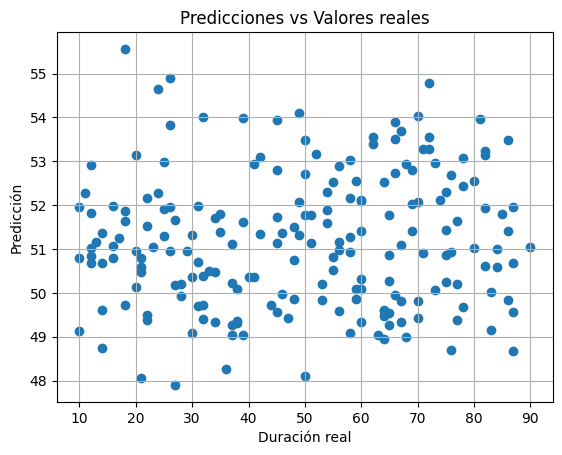

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, preds)
plt.xlabel('Duración real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores reales')
plt.grid(True)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selección de variables (podés sumar más si querés)
X = df[[
    'Distance (km)', 
    'Order Hour', 
    'Orde Month',
    # También podés agregar columnas que comiencen con "Restaurant Name_" o "Location_"
] + [col for col in df_encoded.columns if col.startswith('Restaurant Name_') or col.startswith('Location_')]]

y = df_encoded['Delivery Duration (min)']

# División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predicción y evaluación
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 23.417685424180267
R²: -0.09047526966735542


In [19]:
mean_durations = df.groupby(['Restaurant Name', 'Order Hour'])['Delivery Duration (min)'].mean().reset_index()


In [20]:
def clasificar_entrega(minutos):
    if minutos <= 15:
        return 'Rápida'
    elif minutos <= 30:
        return 'Promedio'
    else:
        return 'Lenta'

df_encoded['Entrega Clase'] = df_encoded['Delivery Duration (min)'].apply(clasificar_entrega)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df[[
    'Distance (km)', 'Order Hour', 'Orde Month'
] + [col for col in df_encoded.columns if col.startswith('Restaurant Name_') or col.startswith('Location_')]]

y = df_encoded['Entrega Clase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[135   8   5]
 [ 36   2   0]
 [ 13   0   1]]
              precision    recall  f1-score   support

       Lenta       0.73      0.91      0.81       148
    Promedio       0.20      0.05      0.08        38
      Rápida       0.17      0.07      0.10        14

    accuracy                           0.69       200
   macro avg       0.37      0.35      0.33       200
weighted avg       0.59      0.69      0.62       200



In [22]:
clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)


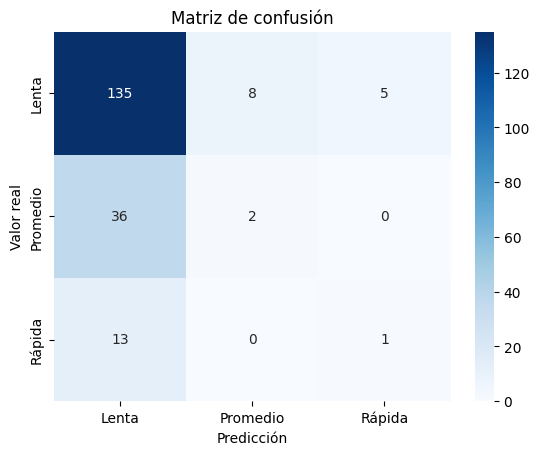

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ensure clf is fitted before accessing clf.classes_
if not hasattr(clf, "classes_"):
	clf.fit(X_train, y_train)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()


* 135 entregas "Lentas" fueron correctamente clasificadas como "Lenta".
* 36 entregas "Promedio" fueron mal clasificadas como "Lenta".
* El modelo casi nunca acierta con clases "Rápidas" ni "Promedio", lo que indica un desequilibrio o una falta de distinción clara entre esas clases en los datos.

Indica que 135 entregas fueron entregadas mas lentas de lo común

# PREGUNTA 2
Ahora quiero, Predecir el monto del precio del pedido (Price ($)) 
- 2.1. Variables independientes: Taco Size, Taco Type, Toppings Count 
- 2.2. ¿El tipo de taco y la cantidad de ingredientes afectan el precio?
El objetivo es predecir un valor numérico continuo: el precio del pedido.

## 1. Preprocesamiento de datos
Primero codificamos las variables categóricas:

In [24]:
df_encoded = df.copy()

# Codificamos Taco Size y Taco Type con get_dummies
df_encoded = pd.get_dummies(df_encoded, columns=['Taco Size', 'Taco Type'], drop_first=True)


## 2. Definir variables independientes y objetivo

In [25]:
X = df_encoded[['Toppings Count'] + 
               [col for col in df_encoded.columns if col.startswith('Taco Size_') or col.startswith('Taco Type_')]]
y = df_encoded['Price ($)']


## 3. Entrenar y evaluar el modelo

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

import numpy as np
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
print("R²:", r2_score(y_test, preds))


RMSE: 3.2730308725860408e-15
R²: 1.0


## 4. ¿Influye el tipo de taco y los ingredientes?

<Axes: xlabel='Taco Type', ylabel='Price ($)'>

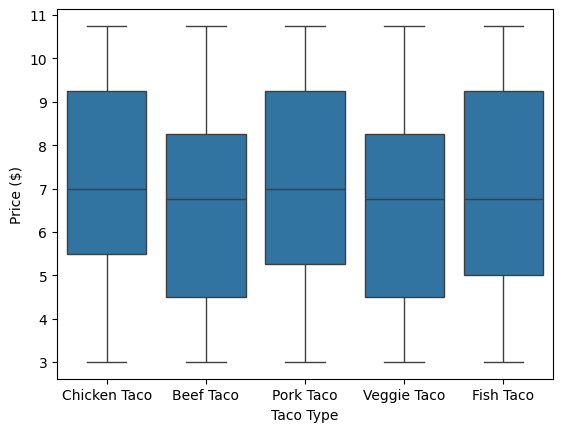

In [27]:
import seaborn as sns
sns.boxplot(x='Taco Type', y='Price ($)', data=df)


Y un gráfico de dispersión para los toppings

<Axes: xlabel='Toppings Count', ylabel='Price ($)'>

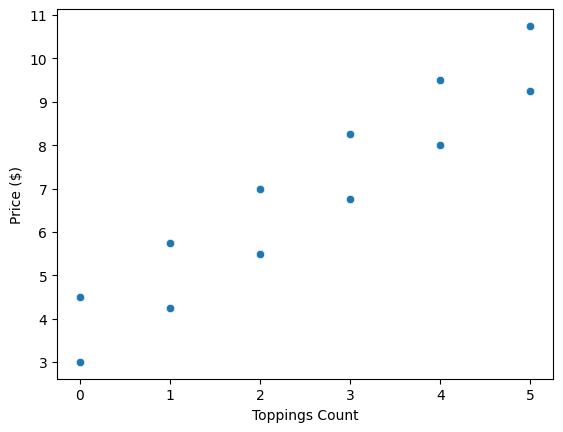

In [28]:
sns.scatterplot(x='Toppings Count', y='Price ($)', data=df)


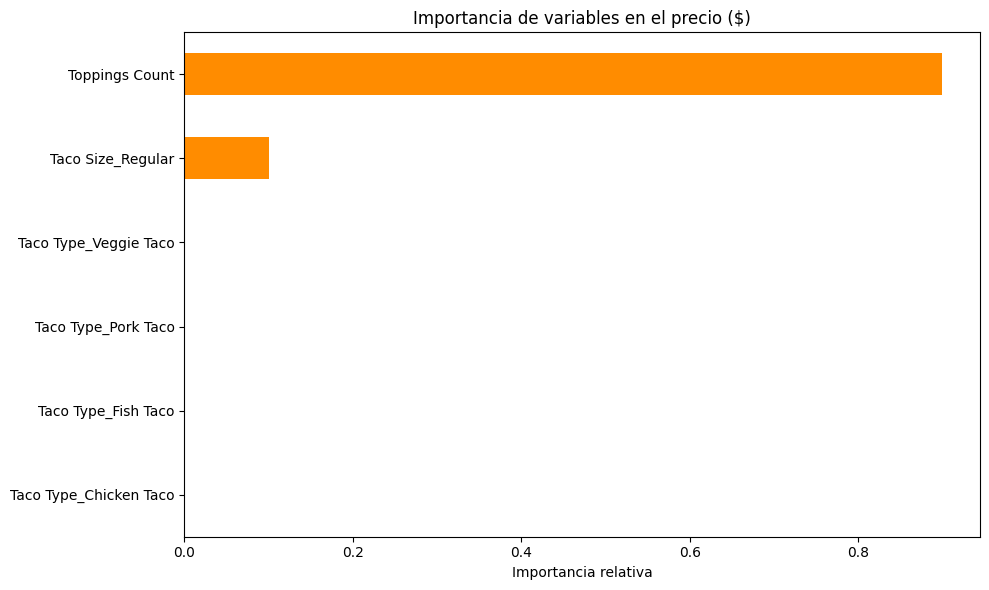

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Importancia de variables
importancias = pd.Series(model.feature_importances_, index=X.columns)
importancias.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color='darkorange')
plt.title('Importancia de variables en el precio ($)')
plt.xlabel('Importancia relativa')
plt.tight_layout()
plt.show()


In [30]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X, y)

# Coeficiente de Toppings Count
print(f"Precio extra por cada topping: ${model_lr.coef_[X.columns.get_loc('Toppings Count')]:.2f}")


Precio extra por cada topping: $1.25
